### Key Highlights
- Used LLM-based embeddings (Sentence Transformers)
- Applied classical ML on dense representations
- Implemented semantic search
- End-to-end reproducible pipeline

### Skills Demonstrated
Python, Machine Learning, NLP, LLM embeddings, Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


2026-02-09 14:00:05.869517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770645606.051467      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770645606.108254      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770645606.541892      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770645606.541931      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770645606.541934      55 computation_placer.cc:177] computation placer alr

In [2]:
data = {
    "text": [
        "This product is excellent and works perfectly",
        "Worst experience ever, totally disappointed",
        "Very satisfied with the service",
        "Not worth the money",
        "Highly recommend this item",
        "Terrible quality and poor support"
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)
df


,text,label
0,This product is excellent and works perfectly,1
1,"Worst experience ever, totally disappointed",0
2,Very satisfied with the service,1
3,Not worth the money,0
4,Highly recommend this item,1
5,Terrible quality and poor support,0


Text Embeddings (LLM-style)

In [3]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

X_embeddings = embedding_model.encode(df["text"].tolist())
y = df["label"].values


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y, test_size=0.2, random_state=42
)


Machine Learning Model

In [5]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Semantic Search (LLM Use Case)

In [7]:
documents = df["text"].tolist()
doc_embeddings = embedding_model.encode(documents)

def semantic_search(query, top_k=1):
    query_emb = embedding_model.encode([query])
    scores = cosine_similarity(query_emb, doc_embeddings)
    top_indices = np.argsort(scores[0])[::-1][:top_k]
    return [documents[i] for i in top_indices]

semantic_search("bad quality product")


['Terrible quality and poor support']

Visualization

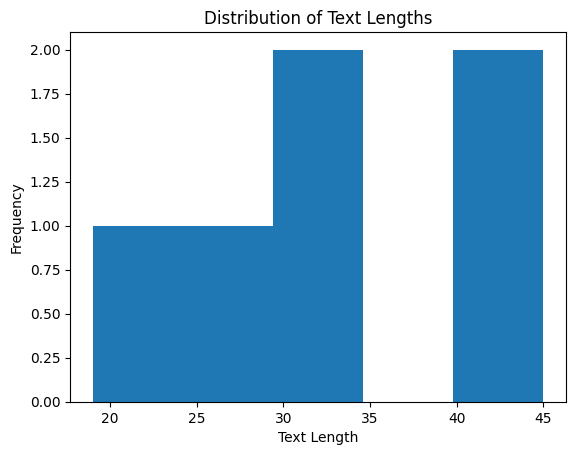

In [8]:
lengths = df["text"].apply(len)

plt.hist(lengths, bins=5)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()
